In [4]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(type(trainImages[0]))
print(np.unique(trainImages[0]))
trainImages = trainImages.astype(np.float32)
trainImages /= 255
testImages = testImages.astype(np.float32)
testImages /= 255
print(np.unique(trainImages[0]))
NUM_DIGITS = 10
trainLabels = keras.utils.to_categorical(train_labels, NUM_DIGITS)
testLabels = keras.utils.to_categorical(test_labels, NUM_DIGITS)

model = Sequential()
model.add(Dense(128, input_shape=(FLATTEN_DIM,), activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
tb = TensorBoard(log_dir="logs/demo67", write_graph=True, write_images=True)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
trainHistory = model.fit(trainImages, trainLabels, validation_split=0.1, epochs=10, callbacks=[tb])

<class 'numpy.ndarray'>
[  0   1   2   3   9  11  14  16  18  23  24  25  26  27  30  35  36  39
  43  45  46  49  55  56  64  66  70  78  80  81  82  90  93  94 107 108
 114 119 126 127 130 132 133 135 136 139 148 150 154 156 160 166 170 171
 172 175 182 183 186 187 190 195 198 201 205 207 212 213 219 221 225 226
 229 238 240 241 242 244 247 249 250 251 252 253 255]
[0.         0.00392157 0.00784314 0.01176471 0.03529412 0.04313726
 0.05490196 0.0627451  0.07058824 0.09019608 0.09411765 0.09803922
 0.10196079 0.10588235 0.11764706 0.13725491 0.14117648 0.15294118
 0.16862746 0.1764706  0.18039216 0.19215687 0.21568628 0.21960784
 0.2509804  0.25882354 0.27450982 0.30588236 0.3137255  0.31764707
 0.32156864 0.3529412  0.3647059  0.36862746 0.41960785 0.42352942
 0.44705883 0.46666667 0.49411765 0.49803922 0.50980395 0.5176471
 0.52156866 0.5294118  0.53333336 0.54509807 0.5803922  0.5882353
 0.6039216  0.6117647  0.627451   0.6509804  0.6666667  0.67058825
 0.6745098  0.6862745  0.7137

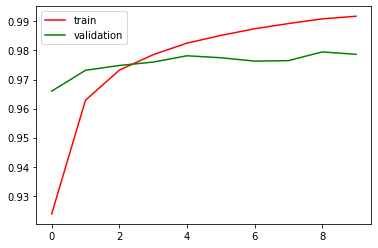

In [5]:
from matplotlib import pyplot as plt
plt.plot(trainHistory.history['accuracy'], color='red')
plt.plot(trainHistory.history['val_accuracy'], color='green')
plt.legend(['train','validation'])

In [6]:
predictLabels = np.argmax(model.predict(testImages),axis=-1)
predictLabels[:10]

313/313 [==============================] - 0s 944us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [7]:
def plotTestImage(index):
    plt.title("test image marked as:%d" % test_labels[index])
    plt.imshow(test_images[index], cmap='binary')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\Envs\\pykt0523\\lib\\site-packages\\matplotlib\\pyplot.py'>

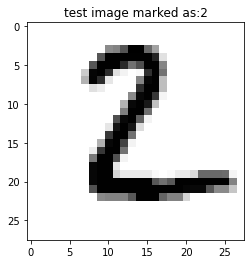

In [9]:
plotTestImage(1)

In [10]:
import pandas as pd
pd.crosstab(test_labels, predictLabels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,2,1,1,2,2,1,0
1,0,1125,3,0,0,1,2,2,2,0
2,2,3,1012,1,2,0,2,8,2,0
3,0,0,9,991,0,2,1,3,3,1
4,3,0,4,0,965,0,3,1,1,5
5,2,0,0,14,0,865,7,1,2,1
6,6,2,1,1,5,3,939,0,1,0
7,1,3,8,3,2,0,0,1002,2,7
8,3,3,9,5,6,3,3,3,934,5


In [11]:
measure1 = pd.DataFrame({'label':test_labels, 'predict':predictLabels})
measure1[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [16]:
measure1[(measure1.label==9) & (measure1.predict==4)]

,label,predict
1232,9,4
1901,9,4
2414,9,4
3850,9,4
4823,9,4
9587,9,4


In [17]:
errorindex = measure1[(measure1.label==9) & (measure1.predict==4)].index

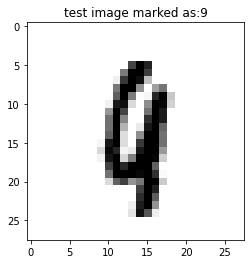

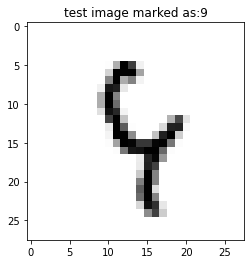

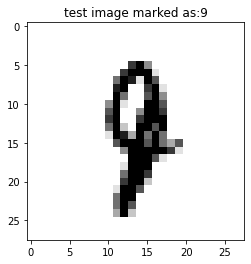

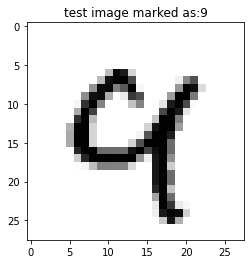

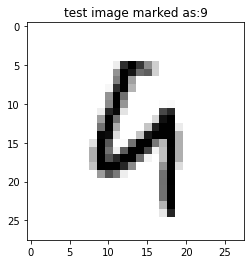

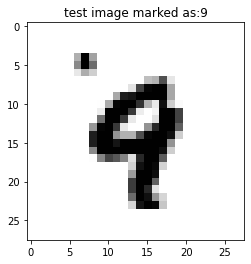

In [18]:
for id in errorindex:
    plotTestImage(id)
    plt.show()